# Linear regression analysis

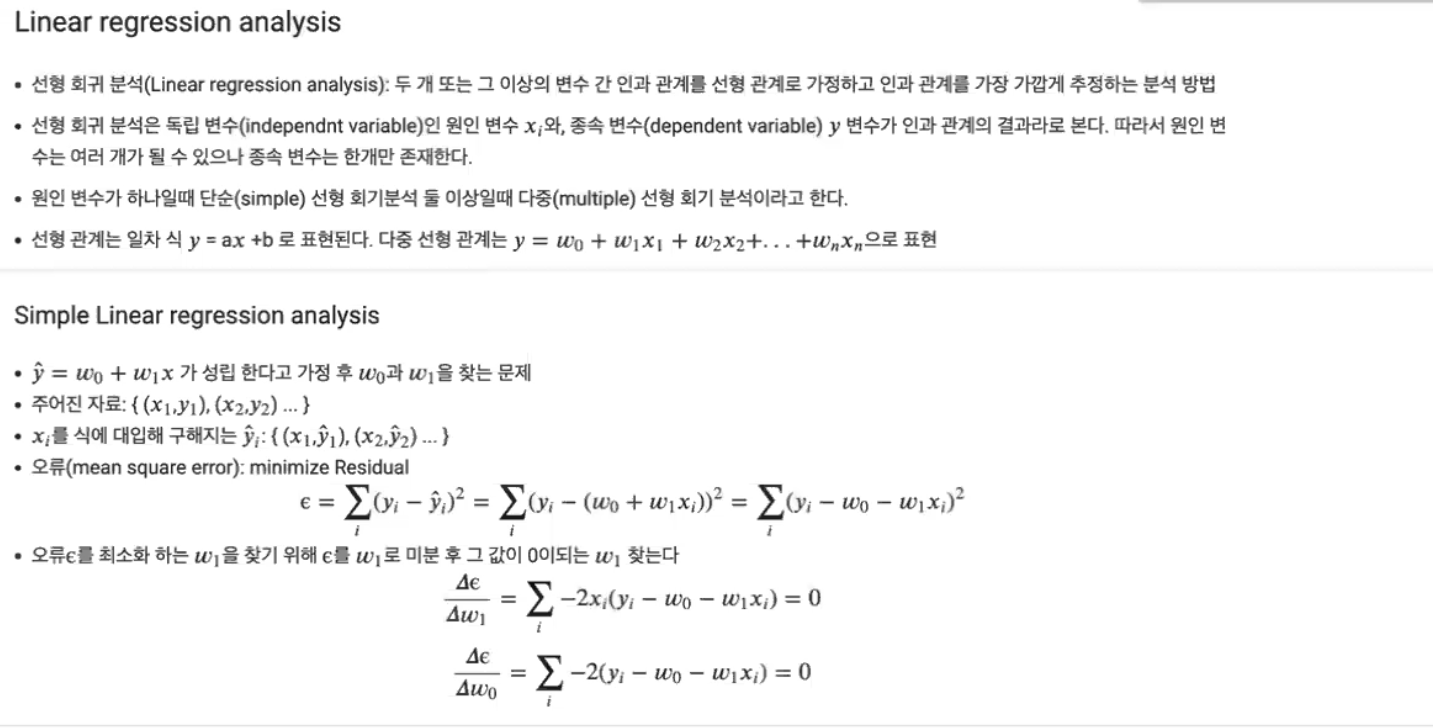

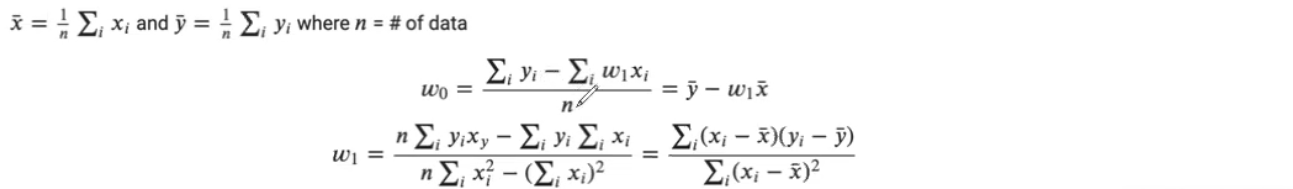

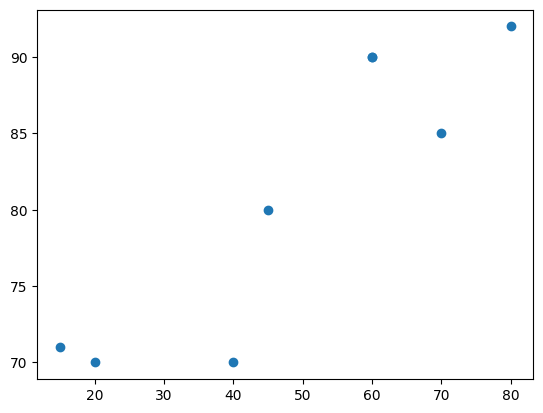

In [67]:
import pandas as pd

engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]

data = {'engReading':engReading, 'engScore':engScore}
df = pd.DataFrame(data)

import matplotlib.pyplot as plt

plt.scatter(df['engReading'], df['engScore'])
plt.show()

- 선형 회귀를 통해 어떠한 직선을 긋고, 해당 직선에서의 오차가 가장 적은 직선을 찾는 것이 목표

   engReading  deltaRead  engScore  deltaScore
0          40      -8.75        70       -11.0
1          45      -3.75        80        -1.0
2          60      11.25        90         9.0
3          20     -28.75        70       -11.0
4          15     -33.75        71       -10.0
5          70      21.25        85         4.0
6          60      11.25        90         9.0
7          80      31.25        92        11.0
y = 0.3705685618729097x + 62.934782608695656


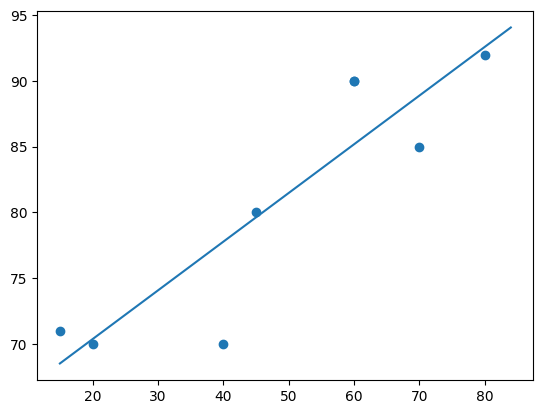

In [68]:
df['deltaRead'] = df['engReading'] - df['engReading'].mean()
df['deltaScore'] = df['engScore'] - df['engScore'].mean()
print(df[['engReading', 'deltaRead', 'engScore', 'deltaScore']])

# weight 0, 1 (가중치 : 회귀를 위한 요소의 가중치)
w1 = (df['deltaRead']*df['deltaScore']).sum() / (df['deltaRead']*df['deltaRead']).sum()
w0 = df['engScore'].mean() - w1*df['engReading'].mean()
print(f"y = {w1}x + {w0}")

x = range(15, 85)
y = w1 * x + w0
plt.plot(x,y)
plt.scatter(df['engReading'], df['engScore'])
plt.show()

- 위의 직선이 변수에 따른 오차가 가장 적은 직선

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀 모델

model = LinearRegression() # 선형 회귀
x = np.array(engReading).reshape(8, 1) # x는 vector 형태
y = np.array(engScore) # y는 list 형태로 주어져야함

print(x)
print(y)

model.fit(x, y)
# sklearn에서 지원하는 상관계수, 편향 관련 메소드
print(model.coef_) # 상관 계수
print(model.intercept_) # 편향

print(model.predict([[55]])) # x값으로 55를 주어서 예

[[40]
 [45]
 [60]
 [20]
 [15]
 [70]
 [60]
 [80]]
[70 80 90 70 71 85 90 92]
[0.37056856]
62.934782608695656
[83.31605351]


# Multiple Linear regression analysis

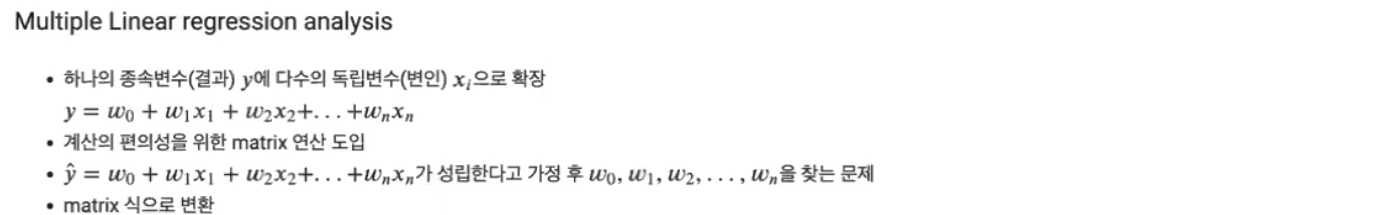

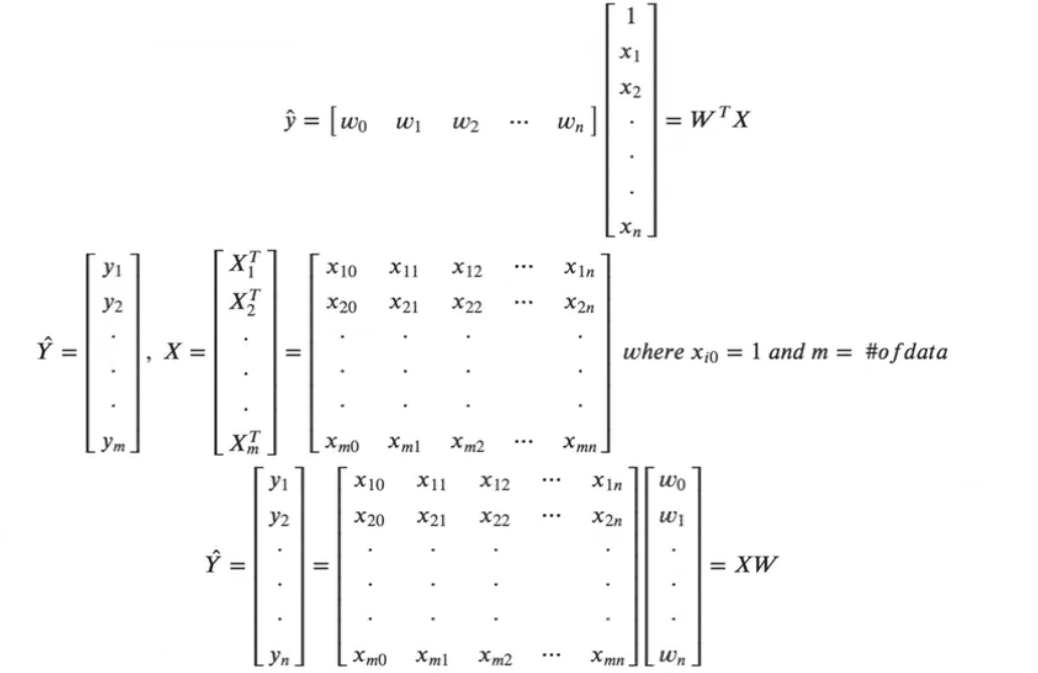

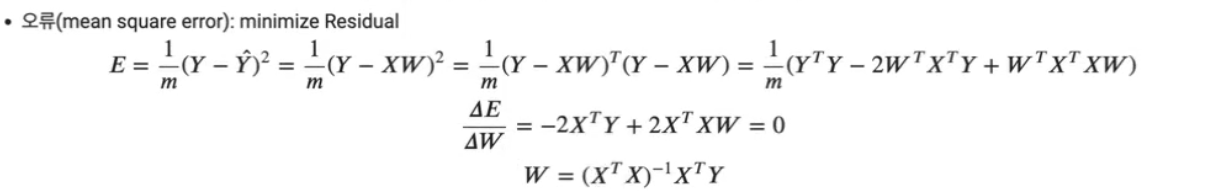

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]
x1 = np.array(engListening).reshape(8, 1) # x1 값 vector 형태로
x2 = np.array(engReading).reshape(8, 1) # x2 값 vector 태
x = np.concatenate((x1, x2), axis=1) # x1, x2를 x로 병합
y = np.array(engScore)

print(x)
print(y)

model.fit(x, y) # x1, x2를 합친 x와 y로
print(model.coef_)
print(model.intercept_)

print(model.predict([[55, 20]])) # x1, x2 값으로 예측 (대신 x자체가 [x1, x2] 형태)

[[30 40]
 [60 45]
 [90 60]
 [31 20]
 [32 15]
 [69 70]
 [92 60]
 [99 80]]
[70 80 90 70 71 85 90 92]
[0.30051938 0.03698199]
60.30197147930643
[77.57017751]


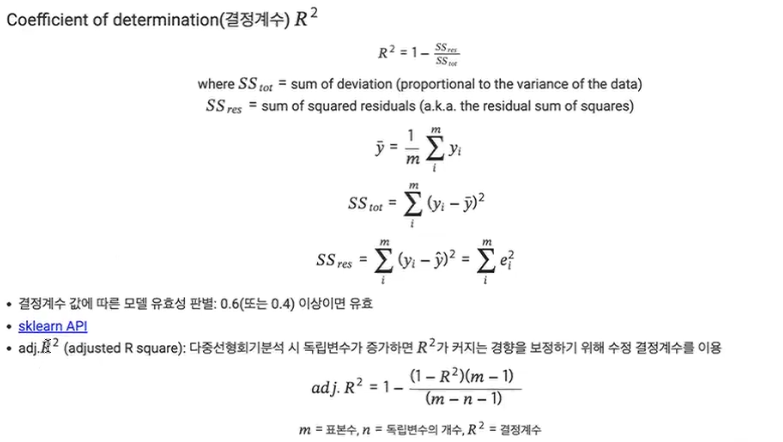

In [71]:
# 단일 선형 회귀
import numpy as np
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(engReading).reshape(8, 1)
y = np.array(engScore)

model.fit(x, y)
yHat = model.predict(x)

print("from LinearRegression model")
print(model.score(x, y)) # 모델 점수

# model 없이 예측치만 사용할 경우 r2_score 활용
from sklearn.metrics import r2_score
print("from R_square score")
print(r2_score(y, yHat))

from LinearRegression model
0.7994352931370405
from R_square score
0.7994352931370405


In [72]:
# x값을 2개로한 선형회귀
import numpy as np

from sklearn.linear_model import LinearRegression
model = LinearRegression()

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]

x1 = np.array(engListening).reshape(8,1)
x2 = np.array(engReading).reshape(8,1)
x = np.concatenate((x1, x2), axis=1)
y = np.array(engScore)

model.fit(x, y)
yHat = model.predict(x)

print("from LinearRegression model")
print(model.score(x, y))

##model 없이 예측치만 사용할 경우 r2_score 활용
from sklearn.metrics import r2_score
print("from R_square score")
r2 = r2_score(y, yHat)

print(r2)
print(len(y))
print("adgusted R_square score")
print(1-((1-r2)*(len(y)-1.))/(len(y)-2-1))

from LinearRegression model
0.9935107485915058
from R_square score
0.9935107485915058
8
adgusted R_square score
0.9909150480281081


# Logistic Regression Analysis (로지스틱 회귀 분석)

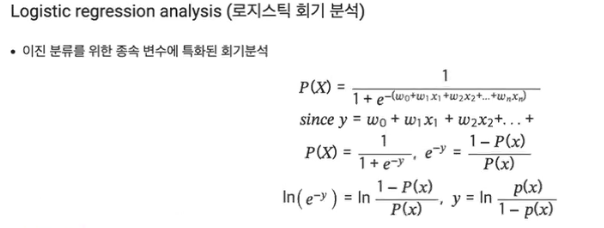

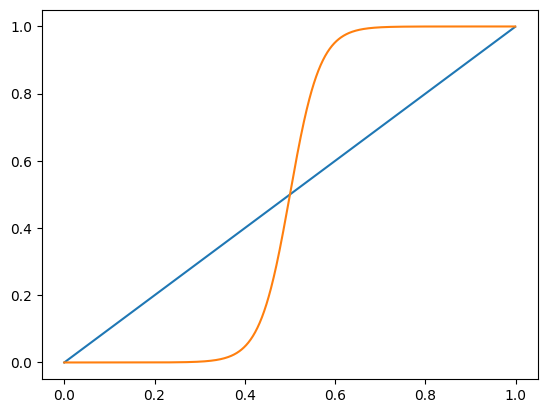

In [73]:
import matplotlib.pyplot as plt

x = np.arange(0., 1., 0.001)
y = x
y2 = 1./(1+np.exp(-30*(x-0.5)))

plt.plot(x, y) # 파란선 y = x
plt.plot(x, y2)  # 주황색 로지스틱 회귀
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engScore = ['fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'pass', 'pass']

x1 = np.array(engListening).reshape(8,1)
x2 = np.array(engReading).reshape(8,1)

x = np.concatenate((x1, x2), axis=1)
y = np.array(engScore)

logistic = LogisticRegression()
logistic.fit(x, y)

logistic.score(x, y)

1.0

# titanic 분석

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
# File 폴더에 들어있는 titanic.csv 파일 활용
titanic_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/File/강승민 - titanic.csv")

print(titanic_df.shape)
titanic_df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
from sklearn.preprocessing import LabelEncoder

# 'Sex' 0, 1로 변형
encoder = LabelEncoder().fit(titanic_df['Sex'])
titanic_df['Sex'] = encoder.transform(titanic_df['Sex'])
print(titanic_df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [78]:
from sklearn.model_selection import train_test_split

# train, test 데이터셋 분리
train, test = train_test_split(titanic_df, test_size=0.10, random_state=1)
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

print(train.shape, test.shape)

(163, 12) (20, 12)


In [79]:
features = ["Pclass", "Sex", "Age", "Fare", "Parch", "SibSp"] # feature로 사용할 columns 값
target = "Survived" # 결과값 (y값)

# train과 test에 대해 features, target 으로 분리
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print("feature Matrix: ", X_train.shape, X_test.shape)
print("target vector: ", y_train.shape, y_test.shape)

feature Matrix:  (163, 6) (20, 6)
target vector:  (163,) (20,)


In [80]:
# 모델 생성 및 학습 시키기
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print("validation")
logistic.score(X_test, y_test)

validation


0.85

In [81]:
model_coef = pd.Series(model.coef_[0], features).sort_values(ascending=False)
print(model_coef)

Pclass    0.300519
Sex       0.300519
Age       0.300519
Fare      0.300519
Parch     0.300519
SibSp     0.300519
dtype: float64
